<a href="https://colab.research.google.com/github/jefflijun/Corona_virus/blob/master/Cov_19_Death_Global_Chart_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import date
from matplotlib.font_manager import FontProperties

url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_Deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

df_confirmed = pd.read_csv(url_confirmed, error_bad_lines=False)
df_death = pd.read_csv(url_Deaths, error_bad_lines=False)
df_death = df_death.replace(np.nan, '', regex=True)

In [0]:
# Set deaths for Day 0
N = 50

# Preparing country table - Canada, US
country = ['Canada', 'US']
data_death = ['','']

for n in range(len(country)):
  data_death_temp = df_death[df_death['Country/Region']==country[n]].T
  data_death_temp.columns = data_death_temp.iloc[0]

  for i in range(4):
    data_death_temp = data_death_temp.drop(data_death_temp.index[0])

  data_death_temp[country[n]] = data_death_temp.sum(axis=1)

  data_death[n] = data_death_temp[data_death_temp[country[n]]>=N]

data_death_CAN_N = data_death[0]
data_death_US_N = data_death[1]['US']

In [0]:
# Preparing country table
country = ['Italy', 'Iran', 'Sweden', 'Spain', 'Germany', 'Turkey', 'Russia', 'Singapore']
data_death = ['', '', '', '', '', '', '', '']

for n in range(len(country)):
  data_death_temp = df_death[df_death['Country/Region']==country[n]].T
  data_death_temp.columns = data_death_temp.iloc[1]

  for i in range(4):
      data_death_temp = data_death_temp.drop(data_death_temp.index[0])
  
  data_death[n] = data_death_temp[data_death_temp[country[n]]>=N]

data_death_ITA_N = data_death[0]
data_death_IRA_N = data_death[1]
data_death_SWE_N = data_death[2]
data_death_SPA_N = data_death[3]
data_death_GER_N = data_death[4]
data_death_TUK_N = data_death[5]
data_death_RUS_N = data_death[6]
data_death_SIN_N = data_death[7]

In [0]:
# Preparing country table - France, UK
country = ['France', 'United Kingdom']
data_death = ['','']

for n in range(len(country)):
  data_death_temp = df_death[(df_death['Country/Region']==country[n]) & (df_death['Province/State']=='')].T
  data_death_temp.columns = data_death_temp.iloc[1]

  for i in range(4):
      data_death_temp = data_death_temp.drop(data_death_temp.index[0])

  data_death[n] = data_death_temp[data_death_temp[country[n]]>=N]

data_death_FRA_N = data_death[0]
data_death_UK_N = data_death[1]

data_death_UK_N = data_death_UK_N.rename(columns={'United Kingdom':'UK'})

In [0]:
# Country Comparing
array_CAN_N = np.array(data_death_CAN_N.loc[(data_death_CAN_N['Canada']>=N), 'Canada'])
array_ITA_N = np.array(data_death_ITA_N)
array_UK_N = np.array(data_death_UK_N)
array_SPA_N = np.array(data_death_SPA_N)
array_FRA_N = np.array(data_death_FRA_N)
array_US_N = np.array(data_death_US_N)
array_GER_N = np.array(data_death_GER_N)
array_IRA_N = np.array(data_death_IRA_N)
array_SWE_N = np.array(data_death_SWE_N)
array_TUK_N = np.array(data_death_TUK_N)
array_RUS_N = np.array(data_death_RUS_N)
array_SIN_N = np.array(data_death_SIN_N)

data_death_COUNTRY_com_N = pd.DataFrame(array_ITA_N)
data_death_COUNTRY_com_N = data_death_COUNTRY_com_N.rename(columns={0: 'Italy'})
data_death_COUNTRY_com_N['UK'] = pd.DataFrame(array_UK_N)
data_death_COUNTRY_com_N['US'] = pd.DataFrame(array_US_N)
data_death_COUNTRY_com_N['Canada'] = pd.DataFrame(array_CAN_N)
data_death_COUNTRY_com_N['Germany'] = pd.DataFrame(array_GER_N)
data_death_COUNTRY_com_N['Spain'] = pd.DataFrame(array_SPA_N)
data_death_COUNTRY_com_N['France'] = pd.DataFrame(array_FRA_N)
data_death_COUNTRY_com_N['Iran'] = pd.DataFrame(array_IRA_N)
data_death_COUNTRY_com_N['Sweden'] = pd.DataFrame(array_SWE_N)
data_death_COUNTRY_com_N['Turkey'] = pd.DataFrame(array_TUK_N)
data_death_COUNTRY_com_N['Russia'] = pd.DataFrame(array_RUS_N)
data_death_COUNTRY_com_N['Singapore'] = pd.DataFrame(array_SIN_N)

#data_death_COUNTRY_com_N

In [0]:
# Calculate day gap between starting date to today
start_date = '03/2/2020'
total_date = ((date.today() - datetime.strptime(start_date, '%m/%d/%Y').date())).days-1

# Generate daily amount for every province
Daily_country = ['Italy_D', 'UK_D', 'US_D', 'Canada_D', 'Germany_D', 'Spain_D', 'France_D',\
                 'Iran_D', 'Sweden_D', 'Turkey_D', 'Russia_D', 'Singapore_D']

for i in range(len(Daily_country)):
    data_death_COUNTRY_com_N[Daily_country[i]] = 0
    for j in range(total_date):
        data_death_COUNTRY_com_N.iloc[j+1,i+12] =  data_death_COUNTRY_com_N.iloc[j+1,i] - data_death_COUNTRY_com_N.iloc[j,i]

# Moving Average
Moving_average_period = 5
Daily_country_MA = ['Italy_MA', 'UK_MA', 'US_MA', 'Canada_MA', 'Germany_MA', 'Spain_MA', 'France_MA',\
                    'Iran_MA', 'Sweden_MA', 'Turkey_MA', 'Russia_MA', 'Singapore_MA']
MA_number = len(Daily_country_MA)
for i in range(MA_number):
    data_death_COUNTRY_com_N[Daily_country_MA[i]] = data_death_COUNTRY_com_N.iloc[:,MA_number+i].rolling(window=Moving_average_period).mean()

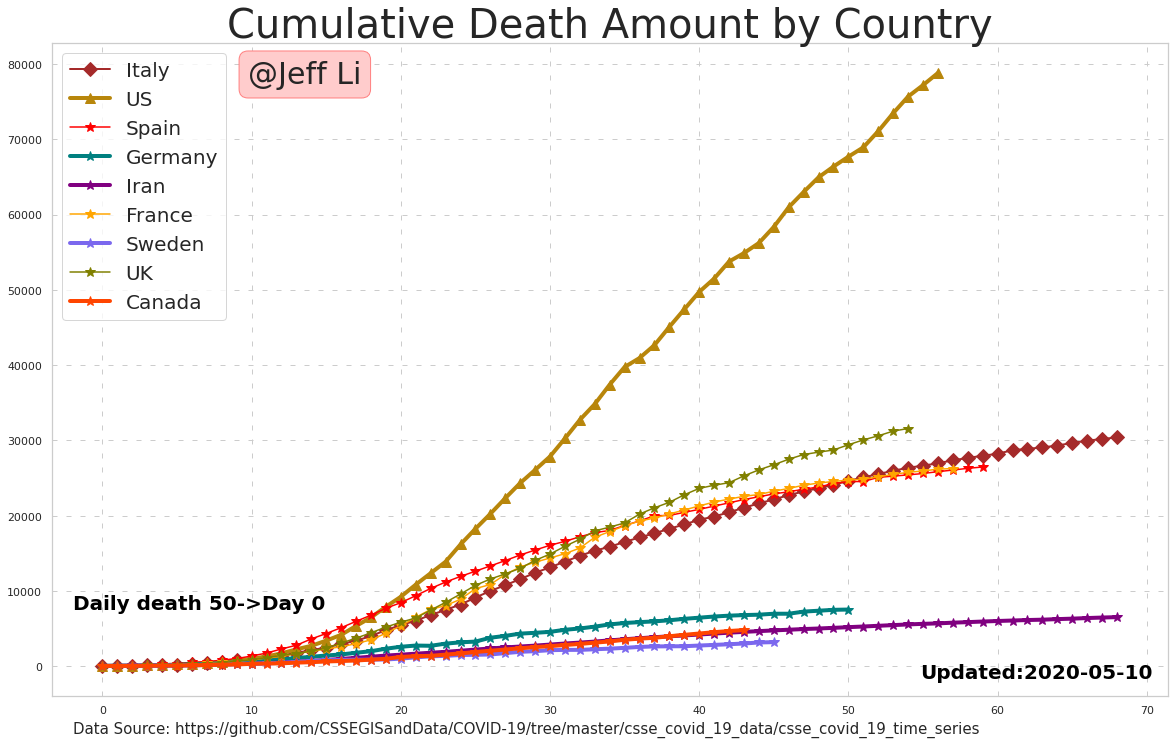

In [79]:
plt.figure(figsize=(20,12))
#plt.grid(axis="y")
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (5,9)

plt.plot(data_death_COUNTRY_com_N['Italy'], color='#A52A2A', linewidth=2, marker='D' , ms = 10)
plt.plot(data_death_COUNTRY_com_N['US'], color='#B8860B', linewidth=4, marker='^' , ms = 10)
plt.plot(data_death_COUNTRY_com_N['Spain'], color='#FF0000', marker='*', ms = 10)
plt.plot(data_death_COUNTRY_com_N['Germany'], color='#008080', linewidth=4, marker='*', ms = 10)
plt.plot(data_death_COUNTRY_com_N['Iran'], color='#800080', linewidth=4, marker='*', ms = 10)
plt.plot(data_death_COUNTRY_com_N['France'], color='#FFA500', marker='*', ms = 10)
plt.plot(data_death_COUNTRY_com_N['Sweden'], color='#7B68EE', linewidth=4, marker='*', ms = 10)
plt.plot(data_death_COUNTRY_com_N['UK'], color='#808000', marker='*', ms = 10)
plt.plot(data_death_COUNTRY_com_N['Canada'], color='#FF4500', linewidth=4, marker='*', ms = 10)

#plt.ylabel(weight='bold')
plt.title('Cumulative Death Amount by Country', fontsize=40, loc='center', pad=None)
plt.legend(['Italy', 'US', 'Spain', 'Germany', 'Iran', 'France', 'Sweden', 'UK', 'Canada'], loc='upper left', prop = {'size':20})


xmin, xmax = plt.xlim()   # return the current xlim
ymin, ymax = plt.ylim()   # return the current ylim
x1_place = xmax*0.19
y1_place = ymax*0.95
plt.text(x1_place, y1_place, "@Jeff Li", size=30, ha="center", va="center", bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))
x2_place = -2
y2_place = ymax*0.1
plt.text(x2_place, y2_place, "Daily death 50->Day 0", size=20, ha="left", va="center", color='Black', weight='bold')
x3_place = xmax-1
y3_place = ymax*(-0.01)
plt.text(x3_place, y3_place, "Updated:"+ str(date.today()), size=20, ha="right", va="center", color='Black', weight='bold')
x4_place = -2
y4_place = ymax*(-0.1)
plt.text(x4_place, y4_place, "Data Source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series",\
         size=15, ha="left", va="center")

plt.savefig('Deaths_global.jpg', dpi=300, transparent=False, bbox_inches='tight')
plt.show()
#data_death[['CAN_death', 'Ontario']].plot()

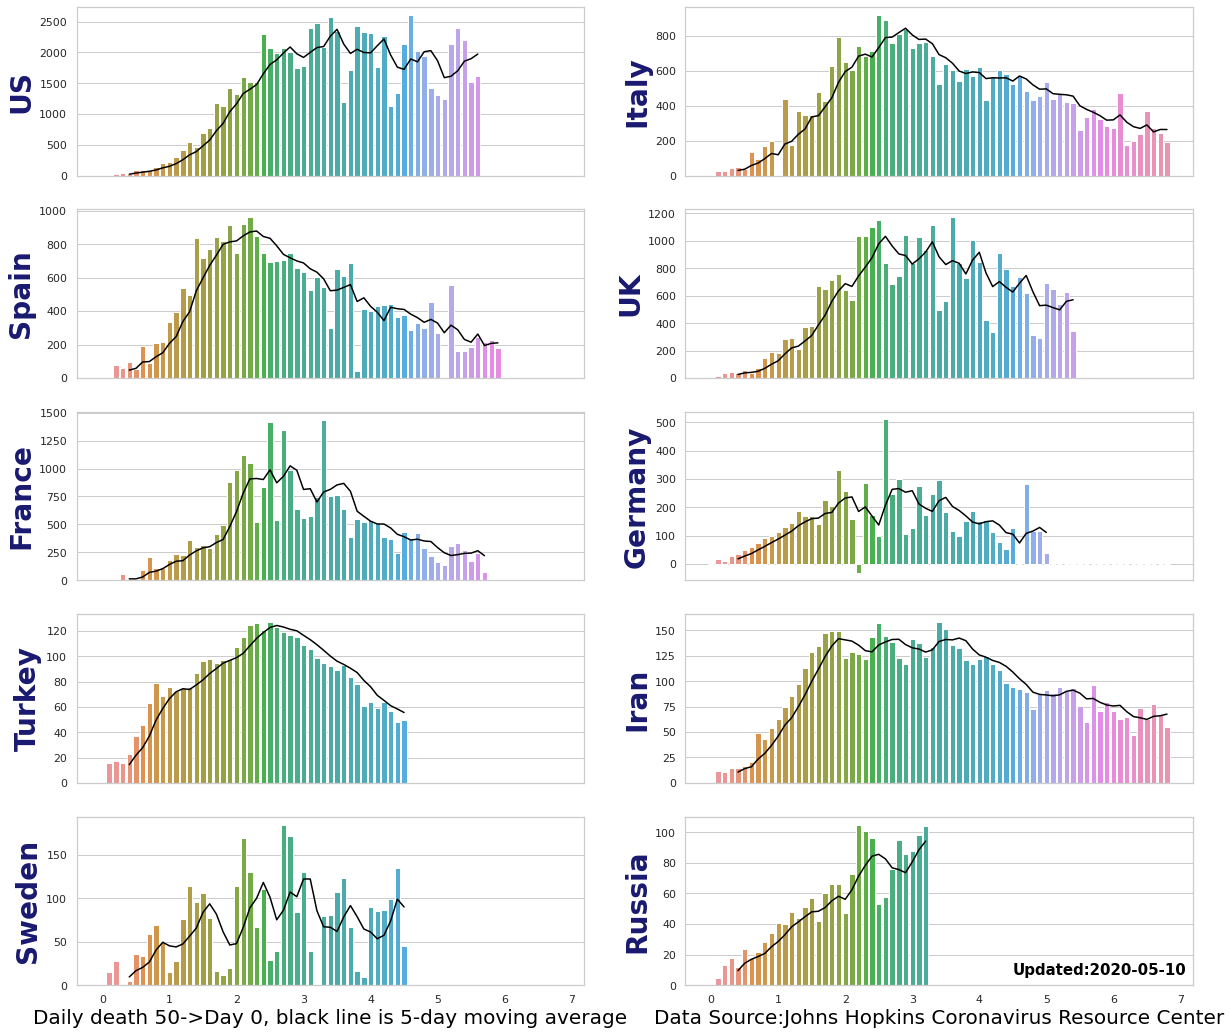

In [80]:
#data_death_COUNTRY_com_N = data_death_COUNTRY_com_N.fillna(0)
for i in range(len(Daily_country)):
    data_death_COUNTRY_com_N[Daily_country[i]] = data_death_COUNTRY_com_N[Daily_country[i]].fillna(0)

data_death_COUNTRY_com_N = data_death_COUNTRY_com_N.reset_index()

import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(5, 2, figsize=(20, 18), sharex=True)

ax1 = sns.barplot(x="index", y="US_D", data=data_death_COUNTRY_com_N, ax=axes[0, 0])
ax1 = sns.lineplot(x="index", y="US_MA", data=data_death_COUNTRY_com_N, color="Black", ax=axes[0, 0])
#ax1.set_title('Black Line: five days moving average', fontsize=20,color="Black", weight='bold')
#ax1.set_yscale('log')
ax1.set(xlabel='', ylabel='')
ax1.set_ylabel("US",fontsize=28, color="#191970", weight='bold')

ax2 = sns.barplot(x="index", y="Italy_D", data=data_death_COUNTRY_com_N, ax=axes[0, 1])
ax2 = sns.lineplot(x="index", y="Italy_MA", data=data_death_COUNTRY_com_N, color="Black", ax=axes[0, 1])
#ax2.set_yscale('log')
ax2.set(xlabel='', ylabel='')
ax2.set_ylabel("Italy",fontsize=28, color="#191970", weight='bold')

ax3 = sns.barplot(x="index", y="Spain_D", data=data_death_COUNTRY_com_N, ax=axes[1, 0])
ax3 = sns.lineplot(x="index", y="Spain_MA", data=data_death_COUNTRY_com_N, color="Black", ax=axes[1, 0])
#ax3.set_yscale('log')
ax3.set(xlabel='', ylabel='')
ax3.set_ylabel("Spain",fontsize=28, color="#191970", weight='bold')

ax4 = sns.barplot(x="index", y="UK_D", data=data_death_COUNTRY_com_N, ax=axes[1, 1])
ax4 = sns.lineplot(x="index", y="UK_MA", data=data_death_COUNTRY_com_N, color="Black", ax=axes[1, 1])
#ax4.set_yscale('log')
ax4.set(xlabel='', ylabel='')
ax4.set_ylabel("UK",fontsize=28, color="#191970", weight='bold')

ax5= sns.barplot(x="index", y="France_D", data=data_death_COUNTRY_com_N, ax=axes[2, 0])
ax5= sns.lineplot(x="index", y="France_MA", data=data_death_COUNTRY_com_N, color="Black", ax=axes[2, 0])
#ax5set_yscale('log')
ax5.set(xlabel='', ylabel='')
ax5.set_ylabel("France",fontsize=28, color="#191970", weight='bold')

ax6 = sns.barplot(x="index", y="Germany_D", data=data_death_COUNTRY_com_N, ax=axes[2, 1])
ax6 = sns.lineplot(x="index", y="Germany_MA", data=data_death_COUNTRY_com_N, color="Black", ax=axes[2, 1])
#ax6.set_yscale('log')
ax6.set(xlabel='', ylabel='')
ax6.set_ylabel("Germany",fontsize=28, color="#191970", weight='bold')

ax7= sns.barplot(x="index", y="Turkey_D", data=data_death_COUNTRY_com_N, ax=axes[3, 0])
ax7= sns.lineplot(x="index", y="Turkey_MA", data=data_death_COUNTRY_com_N, color="Black", ax=axes[3, 0])
#ax7set_yscale('log')
ax7.set(xlabel='', ylabel='')
ax7.set_ylabel("Turkey",fontsize=28, color="#191970", weight='bold')

ax8 = sns.barplot(x="index", y="Iran_D", data=data_death_COUNTRY_com_N, ax=axes[3, 1])
ax8 = sns.lineplot(x="index", y="Iran_MA", data=data_death_COUNTRY_com_N, color="Black", ax=axes[3, 1])
#ax8.set_yscale('log')
ax8.set(xlabel='', ylabel='')
ax8.set_ylabel("Iran",fontsize=28, color="#191970", weight='bold')

ax9= sns.barplot(x="index", y="Sweden_D", data=data_death_COUNTRY_com_N, ax=axes[4, 0])
ax9= sns.lineplot(x="index", y="Sweden_MA", data=data_death_COUNTRY_com_N, color="Black", ax=axes[4, 0])
#ax9set_yscale('log')
ax9.set(xlabel='', ylabel='')
ax9.set_xlabel('Daily death 50->Day 0, black line is 5-day moving average', fontsize=20, color="Black")
ax9.set_ylabel("Sweden",fontsize=28, color="#191970", weight='bold')
ax9.set(xticks=[0,10,20,30,40,50,60,70])

ax10 = sns.barplot(x="index", y="Russia_D", data=data_death_COUNTRY_com_N, ax=axes[4, 1])
ax10 = sns.lineplot(x="index", y="Russia_MA", data=data_death_COUNTRY_com_N, color="Black", ax=axes[4, 1])
#ax10.set_yscale('log')
ax10.set_xlabel('Data Source:Johns Hopkins Coronavirus Resource Center', fontsize=20,color="Black")
ax10.set_ylabel("Russia",fontsize=28, color="#191970", weight='bold')
x_place = xmax-0.5
y_place = 10
ax10.text(x_place, y_place, "Updated:"+ str(date.today()), size=15, ha="right", va="center", color='Black', weight='bold')
ax10.set(xticks=[0,10,20,30,40,50,60,70])

#plt.title('Daily New Increasing')
plt.savefig('Deaths_6_country.jpg', dpi=300, transparent=False, bbox_inches='tight')

plt.show()